In [80]:
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import string
import collections
import pickle

In [87]:
dtt=pd.read_csv('/home/heroo/Downloads/94159_218863_bundle_archive/dataset.csv',)

In [88]:
dtt.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [155]:
lbl=list(set(dtt['language']))
lbl

['Romanian',
 'Thai',
 'Spanish',
 'Turkish',
 'Chinese',
 'Latin',
 'Tamil',
 'Indonesian',
 'Japanese',
 'Arabic',
 'French',
 'Estonian',
 'Persian',
 'Russian',
 'Pushto',
 'Hindi',
 'English',
 'Swedish',
 'Portugese',
 'Urdu',
 'Korean',
 'Dutch']

In [168]:
lbl1={1.0:'Romanian',2.0:'thai',3.0:'Spanish',4.0:'Turkish',5.0:'Chinese',6.0:'Latin',7.0:'Indonesian',8.0:'Japanese',9.0:'Arabic',10.0:'French',11.0:'Estonian',12.0:'Persian',13.0:'Russian',14.0:'Pushto',15.0:'Hindi',16.0:'English',17.0:'Swedish',18.0:'Portugese',19.0:'Urdu',20.0:'Korean',21.0:'Dutch'}

In [166]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
ylx = labelencoder_X_1.fit_transform(lbl)
ylx

array([14, 19, 16, 20,  1, 10, 18,  7,  8,  0,  5,  4, 11, 15, 13,  6,  3,
       17, 12, 21,  9,  2])

In [90]:
dtt.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [169]:

x=dtt.iloc[:,0].values

y = dtt.iloc[:, 1].values
x[0]

'klement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke  aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn kandis aastatel – nime gottwaldov ukrainas harkivi oblastis kandis zmiivi linn aastatel – nime gotvald'

In [194]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
yl = labelencoder_X_1.fit_transform(y)
xc=labelencoder_X_1 .inverse_transform(yl)
xc

array(['Estonian', 'Swedish', 'Thai', ..., 'Spanish', 'Chinese',
       'Romanian'], dtype=object)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    yl,
                                                    test_size = 0.3,
                                                    random_state = 42)



In [161]:
yl[0:22]

array([ 4, 17, 19, 18,  2,  8, 20, 10, 21,  8,  7, 12,  5,  1,  9, 19,  4,
       12, 12,  6, 18, 16])

In [170]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
tfidf_vect = TfidfVectorizer(analyzer='char', ngram_range=(1,3))

In [167]:
models=[]
models.append(('LR', LogisticRegression(multi_class='auto', solver='liblinear')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='scale')))
models.append(('MLP', MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(30,10), random_state=3)))


In [171]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed) 
    
    cv_results = cross_val_score(model,tfidf_vect.fit_transform(X_train), y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.981429 (0.002979)


/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/sklearn/discriminant_analysis.py", line 425, in fit
    dtype=[np.float64, np.float32])
  File "/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/sklearn/base.py", lin

LDA: nan (nan)
KNN: 0.978182 (0.003352)


/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.951818 (0.003218)


/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/sklearn/naive_bayes.py", line 210, in fit
    X, y = self._validate_data(X, y)
  File "/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/sklearn/base.py", line 432, in

NB: nan (nan)
SVM: 0.983961 (0.002662)


/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/sklearn/

/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 470, in _fit_lbfgs
    args=(X, y, activations, deltas, coef_grads, intercept_gr

MLP: nan (nan)


/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1028, in fit
    hasattr(self, "classes_")))
  File "/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 376, in _fit
    intercept_grads, layer_units)
  File "/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 470, in _fit_lbfgs
    args=(X, y, activations, deltas, coef_grads, intercept_gr

In [222]:
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)



In [223]:
X_test=tfidf_vect.fit_transform(X_test)


In [220]:

model = MultinomialNB()
text_clf = Pipeline([('tfidf', tfidf_vect),
                    ('clf', model),
                    ])

In [200]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', MultinomialNB())])

In [201]:
predictions = text_clf.predict(X_test)

In [202]:
acc=accuracy_score(y_test, predictions)
acc

0.9765151515151516

In [203]:
scores = cross_val_score(text_clf,x,yl, cv=5)
print("Mean cross-validation accuracy: " + str(scores.mean()))

Mean cross-validation accuracy: 0.9778636363636363


In [204]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       300
     Chinese       0.99      0.98      0.99       291
       Dutch       0.98      0.97      0.98       313
     English       0.72      1.00      0.83       289
    Estonian       1.00      0.95      0.97       308
      French       0.96      0.99      0.97       287
       Hindi       1.00      0.98      0.99       314
  Indonesian       1.00      0.96      0.98       295
    Japanese       1.00      0.99      0.99       302
      Korean       1.00      0.99      0.99       296
       Latin       0.99      0.89      0.94       312
     Persian       0.99      1.00      0.99       299
   Portugese       0.99      0.94      0.96       293
      Pushto       1.00      0.96      0.98       303
    Romanian       1.00      0.98      0.99       291
     Russian       0.99      1.00      0.99       302
     Spanish       0.98      0.99      0.98       287
     Swedish       1.00    

[Text(0, 0.5, 'Estonian'),
 Text(0, 1.5, 'Swedish'),
 Text(0, 2.5, 'Thai'),
 Text(0, 3.5, 'Tamil'),
 Text(0, 4.5, 'Dutch'),
 Text(0, 5.5, 'Japanese'),
 Text(0, 6.5, 'Turkish'),
 Text(0, 7.5, 'Latin'),
 Text(0, 8.5, 'Urdu'),
 Text(0, 9.5, 'Japanese'),
 Text(0, 10.5, 'Indonesian'),
 Text(0, 11.5, 'Portugese'),
 Text(0, 12.5, 'French'),
 Text(0, 13.5, 'Chinese'),
 Text(0, 14.5, 'Korean'),
 Text(0, 15.5, 'Thai'),
 Text(0, 16.5, 'Estonian'),
 Text(0, 17.5, 'Portugese'),
 Text(0, 18.5, 'Portugese'),
 Text(0, 19.5, 'Hindi'),
 Text(0, 20.5, 'Tamil'),
 Text(0, 21.5, 'Spanish')]

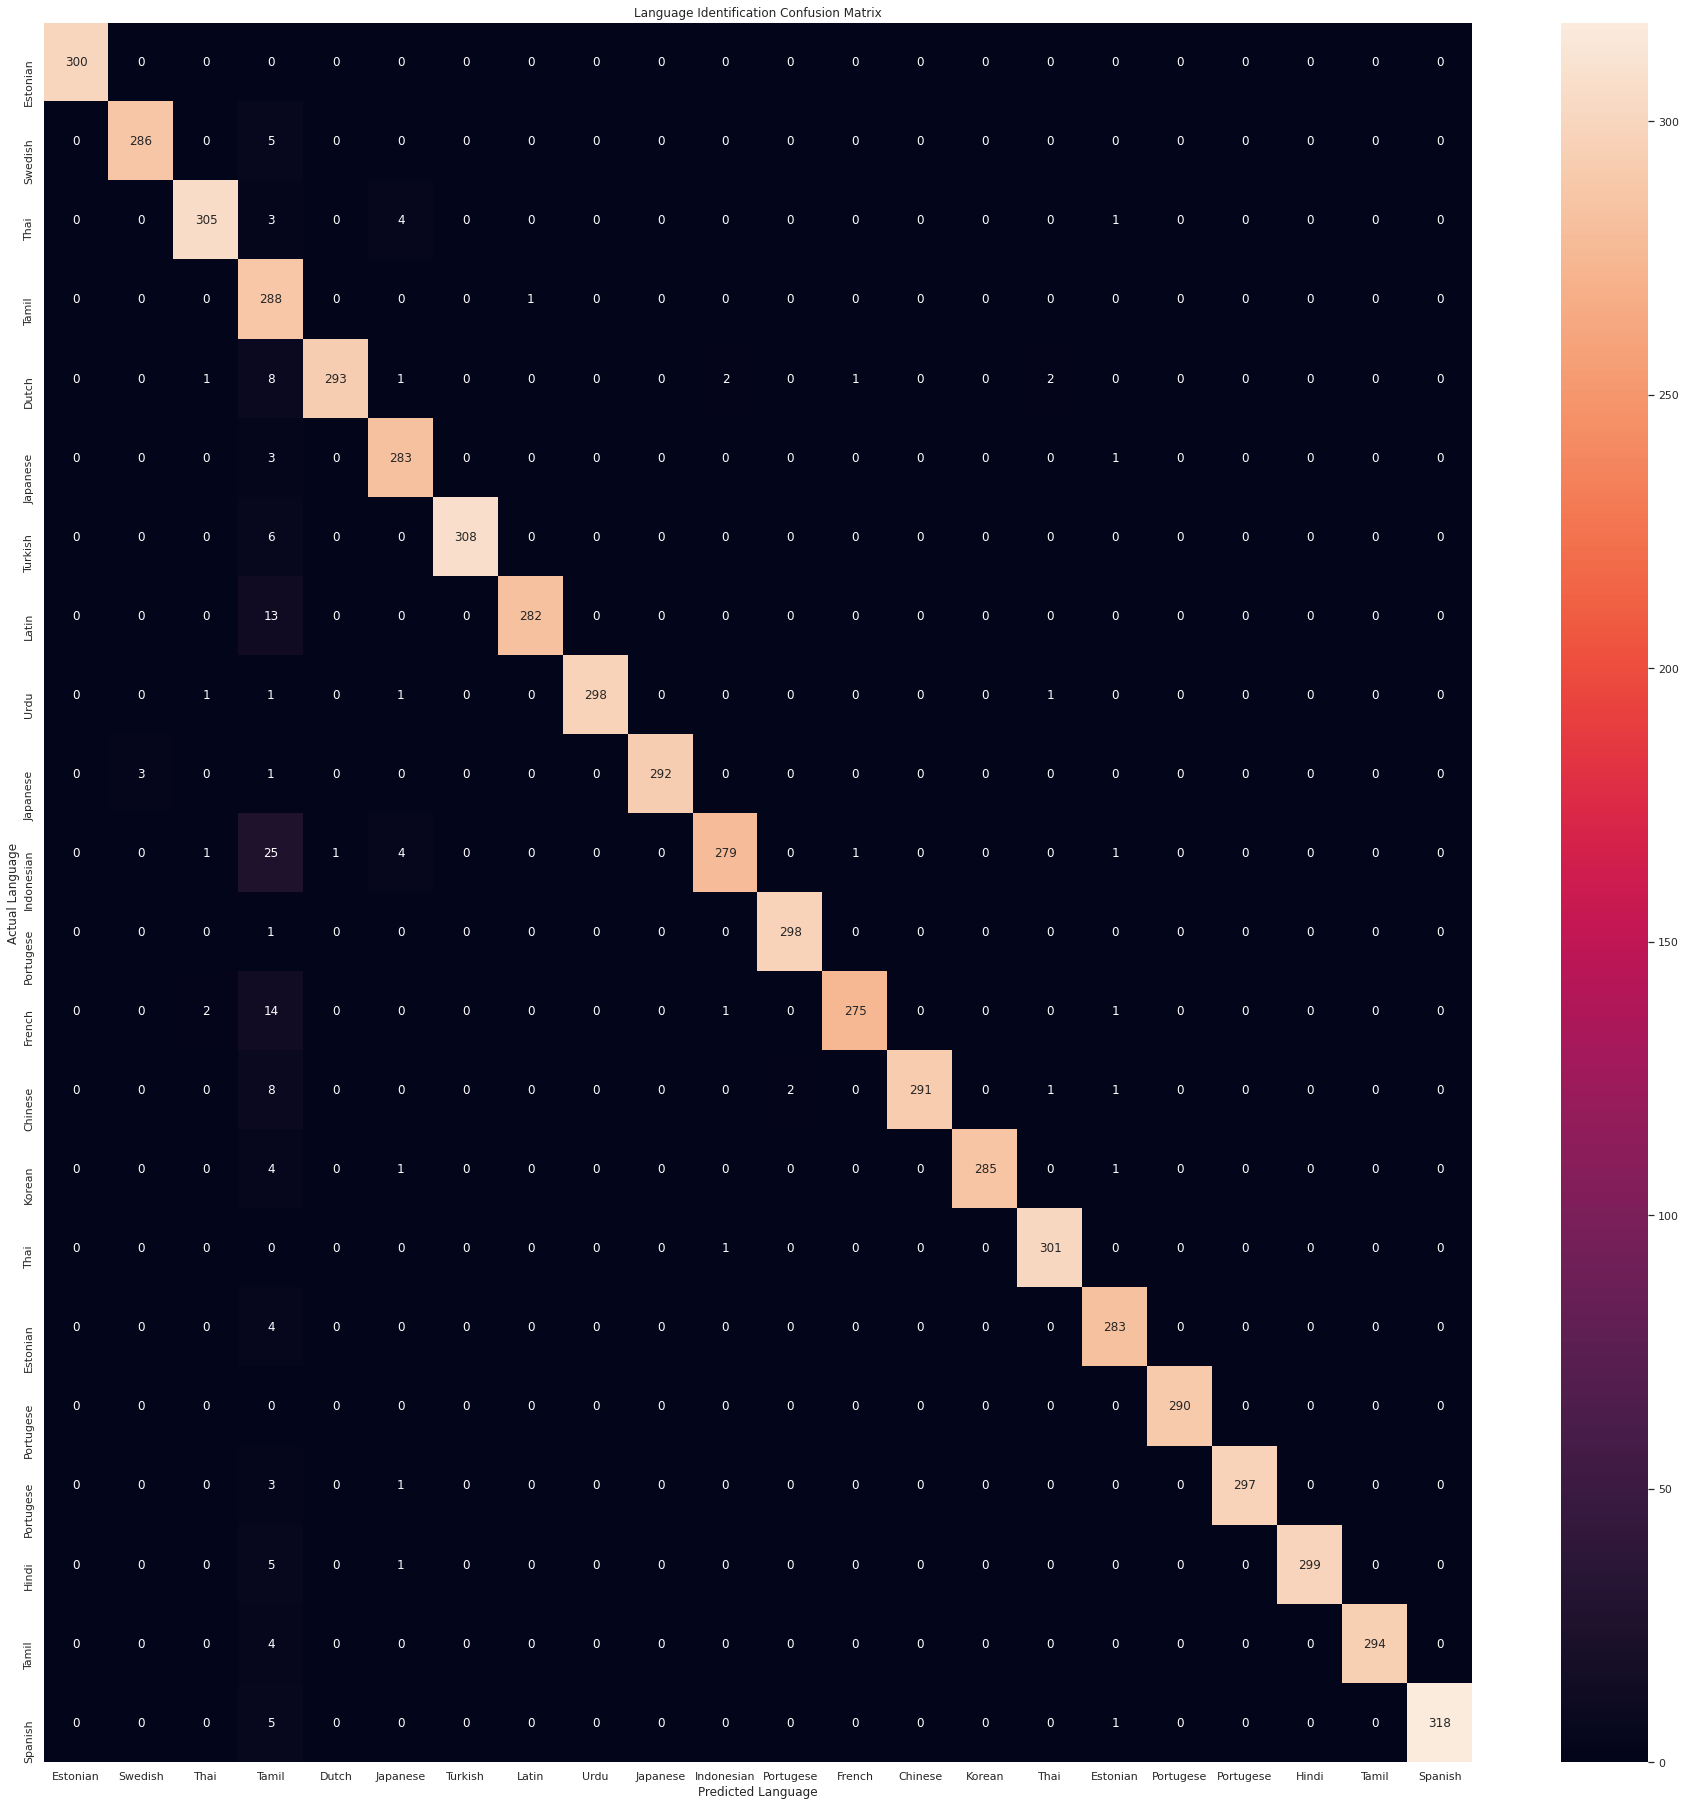

In [214]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import os
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.figure(figsize=(32, 32))
cm = confusion_matrix(y_test, predictions)

ax = sns.heatmap(cm, annot = True, fmt = "d")

ax.set_xlabel('Predicted Language')
ax.set_ylabel('Actual Language')
ax.set_title('Language Identification Confusion Matrix')
ax.set_xticklabels(y)
ax.set_yticklabels(y)

In [211]:
 '''
    true_values = np.array(y_test)
    
    for i, sentence in enumerate(X_test):
        prediction = float(predictions[i])
        true_value = float(true_values[i])
        print("Prediction: " + str(lbl1[prediction]))
        print("Actual Language: " + str(lbl1[true_value]))
        print("Input Sentence: ")
        print(sentence)
        print('\n')
test_languages( X_validation,Y_validation,prediction)
'''

'\n   true_values = np.array(y_test)\n   \n   for i, sentence in enumerate(X_test):\n       prediction = float(predictions[i])\n       true_value = float(true_values[i])\n       print("Prediction: " + str(lbl1[prediction]))\n       print("Actual Language: " + str(lbl1[true_value]))\n       print("Input Sentence: ")\n       print(sentence)\n       print(\'\n\')\ntest_languages( X_validation,Y_validation,prediction)\n'

/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


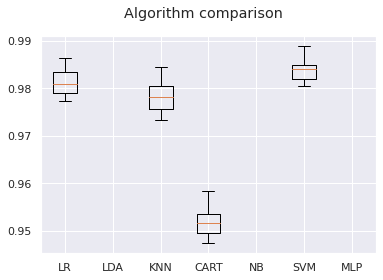

In [212]:
#algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm comparison')
ax = fig.add_subplot(111)
ax.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [229]:
'''
def test_languages(X_test, true_values, predictions):
    '''
    Goal: Visualize the ~99% prediction accuracy by comparing,
        1. natural language sentence
        2. predicted natural language
        3. true natural language
    
    @param X_test: (np.array) X_test is a np.array containing the unseen data from the test set
    @param true_values: (np.array) true_values is a np.array containing the true language_index labels
    @param predictions: (np.array) predictions is a np.array containing the predicted language_index labels
    '''
    
    true_values = np.array(true_values)
    
    for i, sentence in enumerate(X_test):
        prediction = float(predictions[i])
        true_value = float(true_values[i])
        print("Prediction: " + str(y[prediction]))
        print("Actual Language: " + str(y[true_value]))
        print("Input Sentence: ")
        print(sentence)
        print('\n')
test_languages(X_test,y_test,prediction)
'''

TypeError: 'float' object is not subscriptable